# Stage One: Import or collect your data

I imported data from the Twitter API using my credentials and saved the tweet objects. 

In [1]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

In [3]:
import tweepy
import csv 

class StdOutListener(tweepy.Stream):
    def on_status(self, status):
        user = status.author.screen_name
        location = status.user.location
        timeTweet = status.created_at
        source = status.source
        tweet = status.text
        writer.writerow([tweet,timeTweet,user,location,source])

# Stage Two: Make and structure your data in a Pandas dataframe

I created a .csv file of the data from the selected hastag. I chose to collect tweets from #spidermannowayhome to get a sample of the recent conversation surrounding the new trailer. I streamed the tweets for about 10 minutes. I then imported pandas and created my new dataframe. 

In [6]:
def start_streaming():
        with open("new_tweets.csv", 'w', encoding="utf-8", errors="ignore") as file:
            global writer
            writer = csv.writer(file)

            writer.writerow(["Tweet", "Date", "User","Location","Source"])

            try:
                listener = StdOutListener(CONFIG['DEFAULT']['consumer_key'], CONFIG['DEFAULT']['consumer_secret'], CONFIG['DEFAULT']['access_token'], CONFIG['DEFAULT']['access_token_secret'])
                listener.filter(track=["#spidermannowayhome"])  
            except KeyboardInterrupt:
                print("- KeyboardInterrupt caught. Closing stream and exiting.")
                listener.disconnect()
                pass 

In [7]:
start_streaming()

- KeyboardInterrupt caught. Closing stream and exiting.


In [8]:
import pandas as pd

df_tweets = pd.read_csv("new_tweets.csv")

In [9]:
df_tweets.head()

,Tweet,Date,User,Location,Source
0,RT @IniciativaV: ¡El escudo del Cap en la esta...,2021-11-18 16:23:07+00:00,Omega2756742434,NaN,Twitter for iPhone
1,RT @deepanpuliyur: @SpiderManMovie @TomHolland...,2021-11-18 16:23:08+00:00,bandikr1,NaN,Twitter for Android
2,RT @RodBoj: Por favor #SpiderManNoWayHome http...,2021-11-18 16:23:08+00:00,ztarpink,CDMX,Twitter for Android
3,"RT @Porsi_noloviste: ""Tú no eres mi Peter Park...",2021-11-18 16:23:09+00:00,danoismartinez,Panama,Twitter for iPhone
4,"RT @Porsi_noloviste: ""Tú no eres mi Peter Park...",2021-11-18 16:23:09+00:00,SharitoMa,Guatemala,Twitter Web App


# Stage Three: Use NLTK to tokenize the data, and chart a word cloud

I then cleaned up the tweets, removing emoticons, symblrs, and other "noise", and imported NLTK to tokenize the data. I then used the cleaned tweets to chart a word cloud, excluding the main hastag "spidermannowayhome" and the word "spiderman" for a more interesting word cloud. I think this word cloud could be improved by limiting to a single language (there seems to be a heavy mix of English and Spanish here)

In [10]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [11]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [12]:
cleaned_tweets = []
for i in range(0,len(df_tweets['Tweet'])):
    cleaned_tweets.append(cleaning_tweets((df_tweets.Tweet[i])))
print(cleaned_tweets[0:50])

['escudo del cap estatua libertad spidermannowayhome', 'wishing you all happy internationalmensday internationalmensday2021 nov', 'por favor spidermannowayhome', 'eres peter parker spidermannowayhome', 'eres peter parker spidermannowayhome', 'diciembre cuando tobey andrew entren escena spidermannowayhome', 'new footage from spidermannowayhome', 'los fans resistance rescate spiderman 🤣🤣🤣🤣🤣🤣 spidermannowayhome starwars', 'stream', 'meanwhile ... spidermannowayhome', 'por favor spidermannowayhome', 'note how said spiders and not spider "... spidermannowayhome', 'just friendly reminder that spidermannowayhome will include stan lee tribute', 'ele tao destruido sério olha expressão pelo amor deus deixem esse adolescente paz ele nao tem pai ele nao tem', 'ตอนเห องทอมก บเซนม ความเอ ยงห วใส วยอ าาา แอร ยยยยย นอะ นเป ยยยจ งเลยนะ 🥰☺️ spider', 'meanwhile ... spidermannowayhome', 'marvel studios solucionando los trajes clásicos con máscaras cgi spidermannowayhome spiderverseconfirmado https', 'trai

/Users/Rachel/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://t.co/grZou4fQmY" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/Rachel/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://t.co/PVsvuMsSLI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["spidermannowayhome","spiderman"])

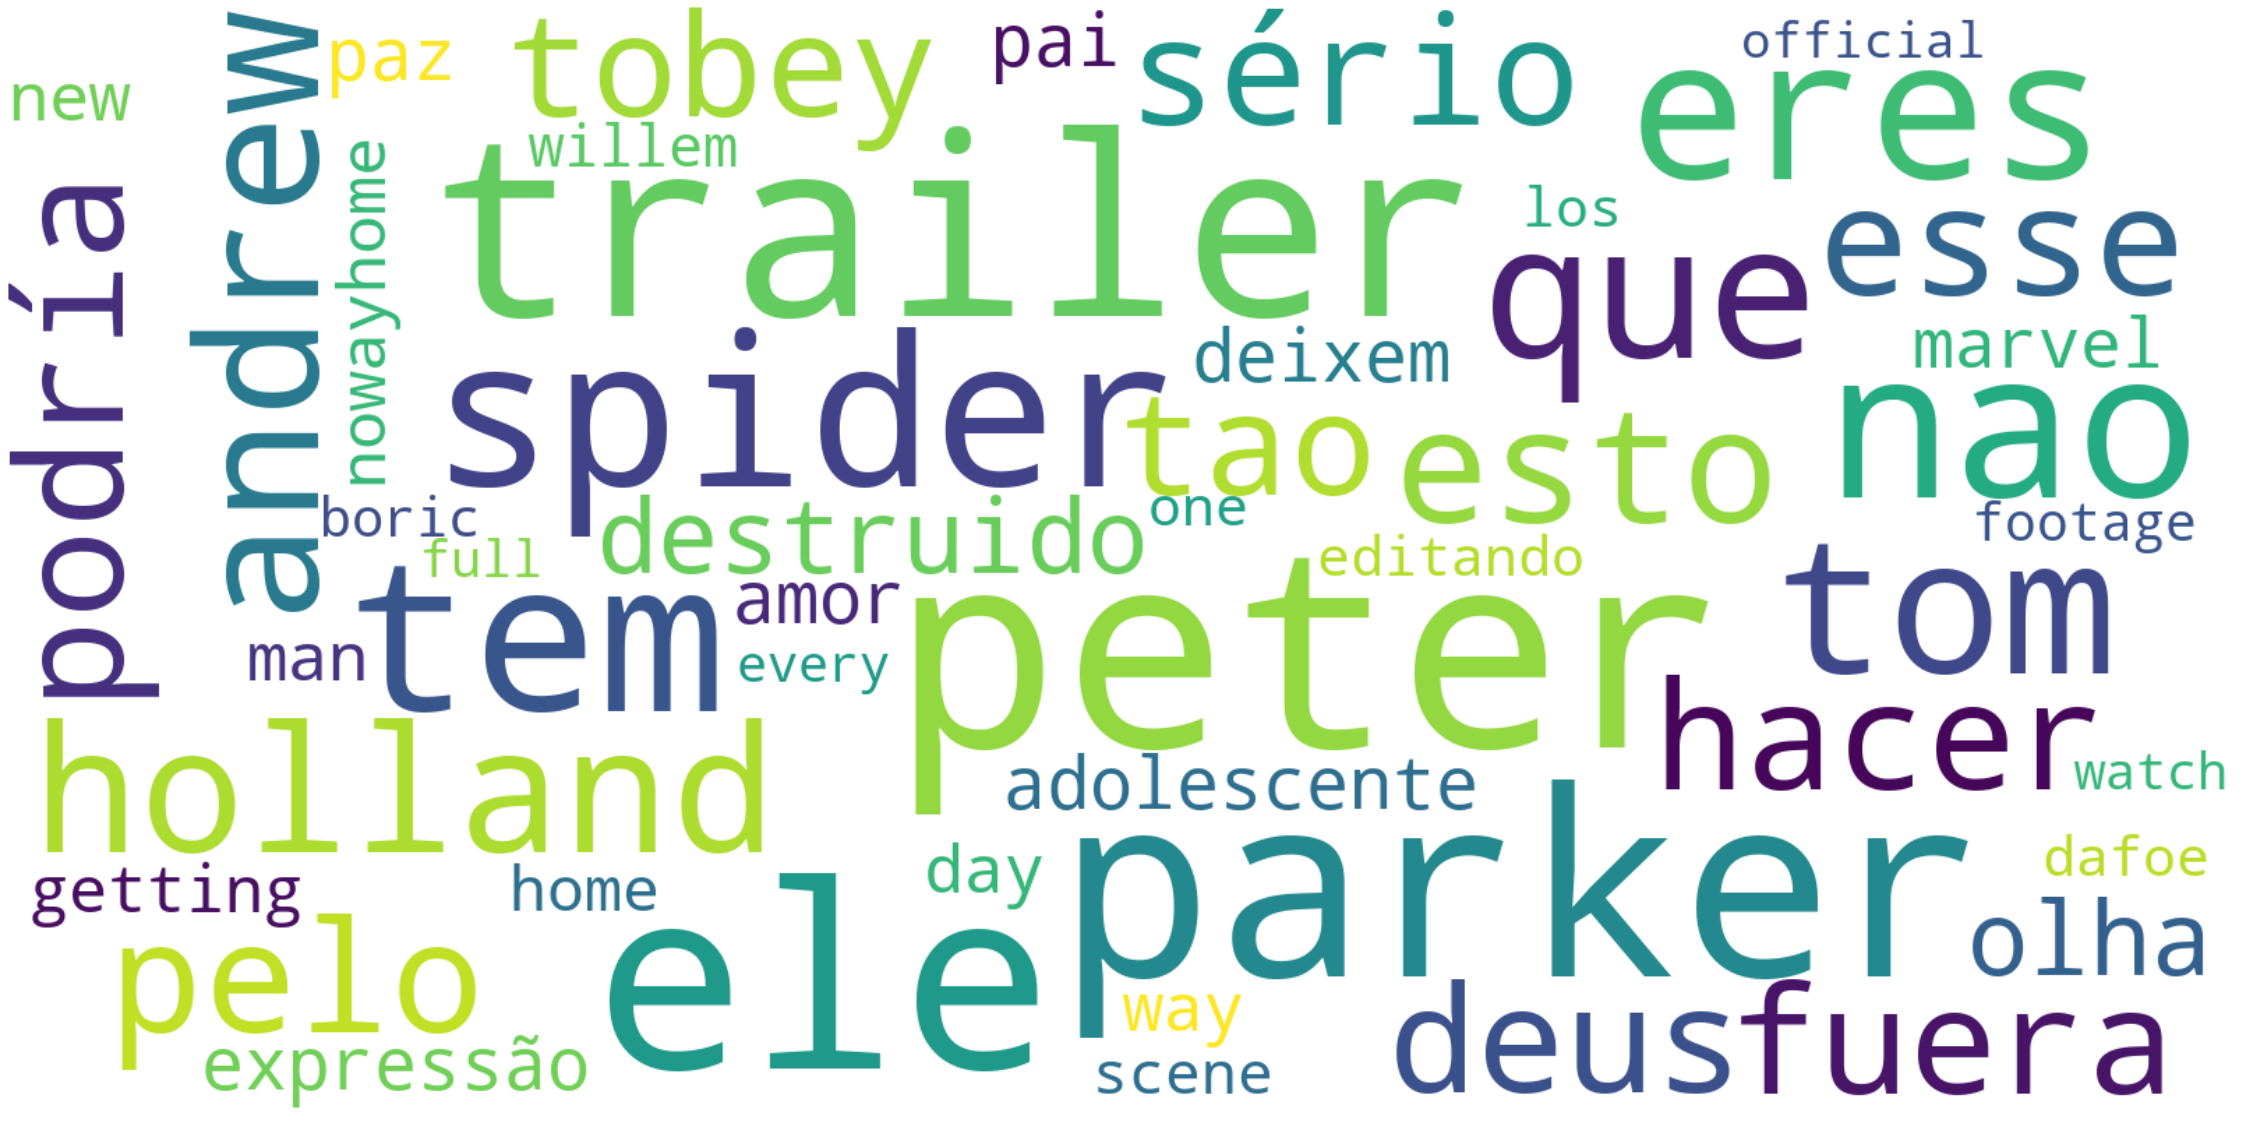

In [14]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Stage Four: Create a "wordcloud of interest"

I imported numpy, PIL, and random as well as an image of Spider-man's iconic eye mask. From there, I created a new word cloud of interest that took the shape of the eye mask. I think another image might have been more interesting here, but it was the only spidey icon I found that worked well with the software. 

In [15]:
import numpy as np
from PIL import Image
import random

In [22]:
mask = np.array(Image.open('./spidey3.jpg'))

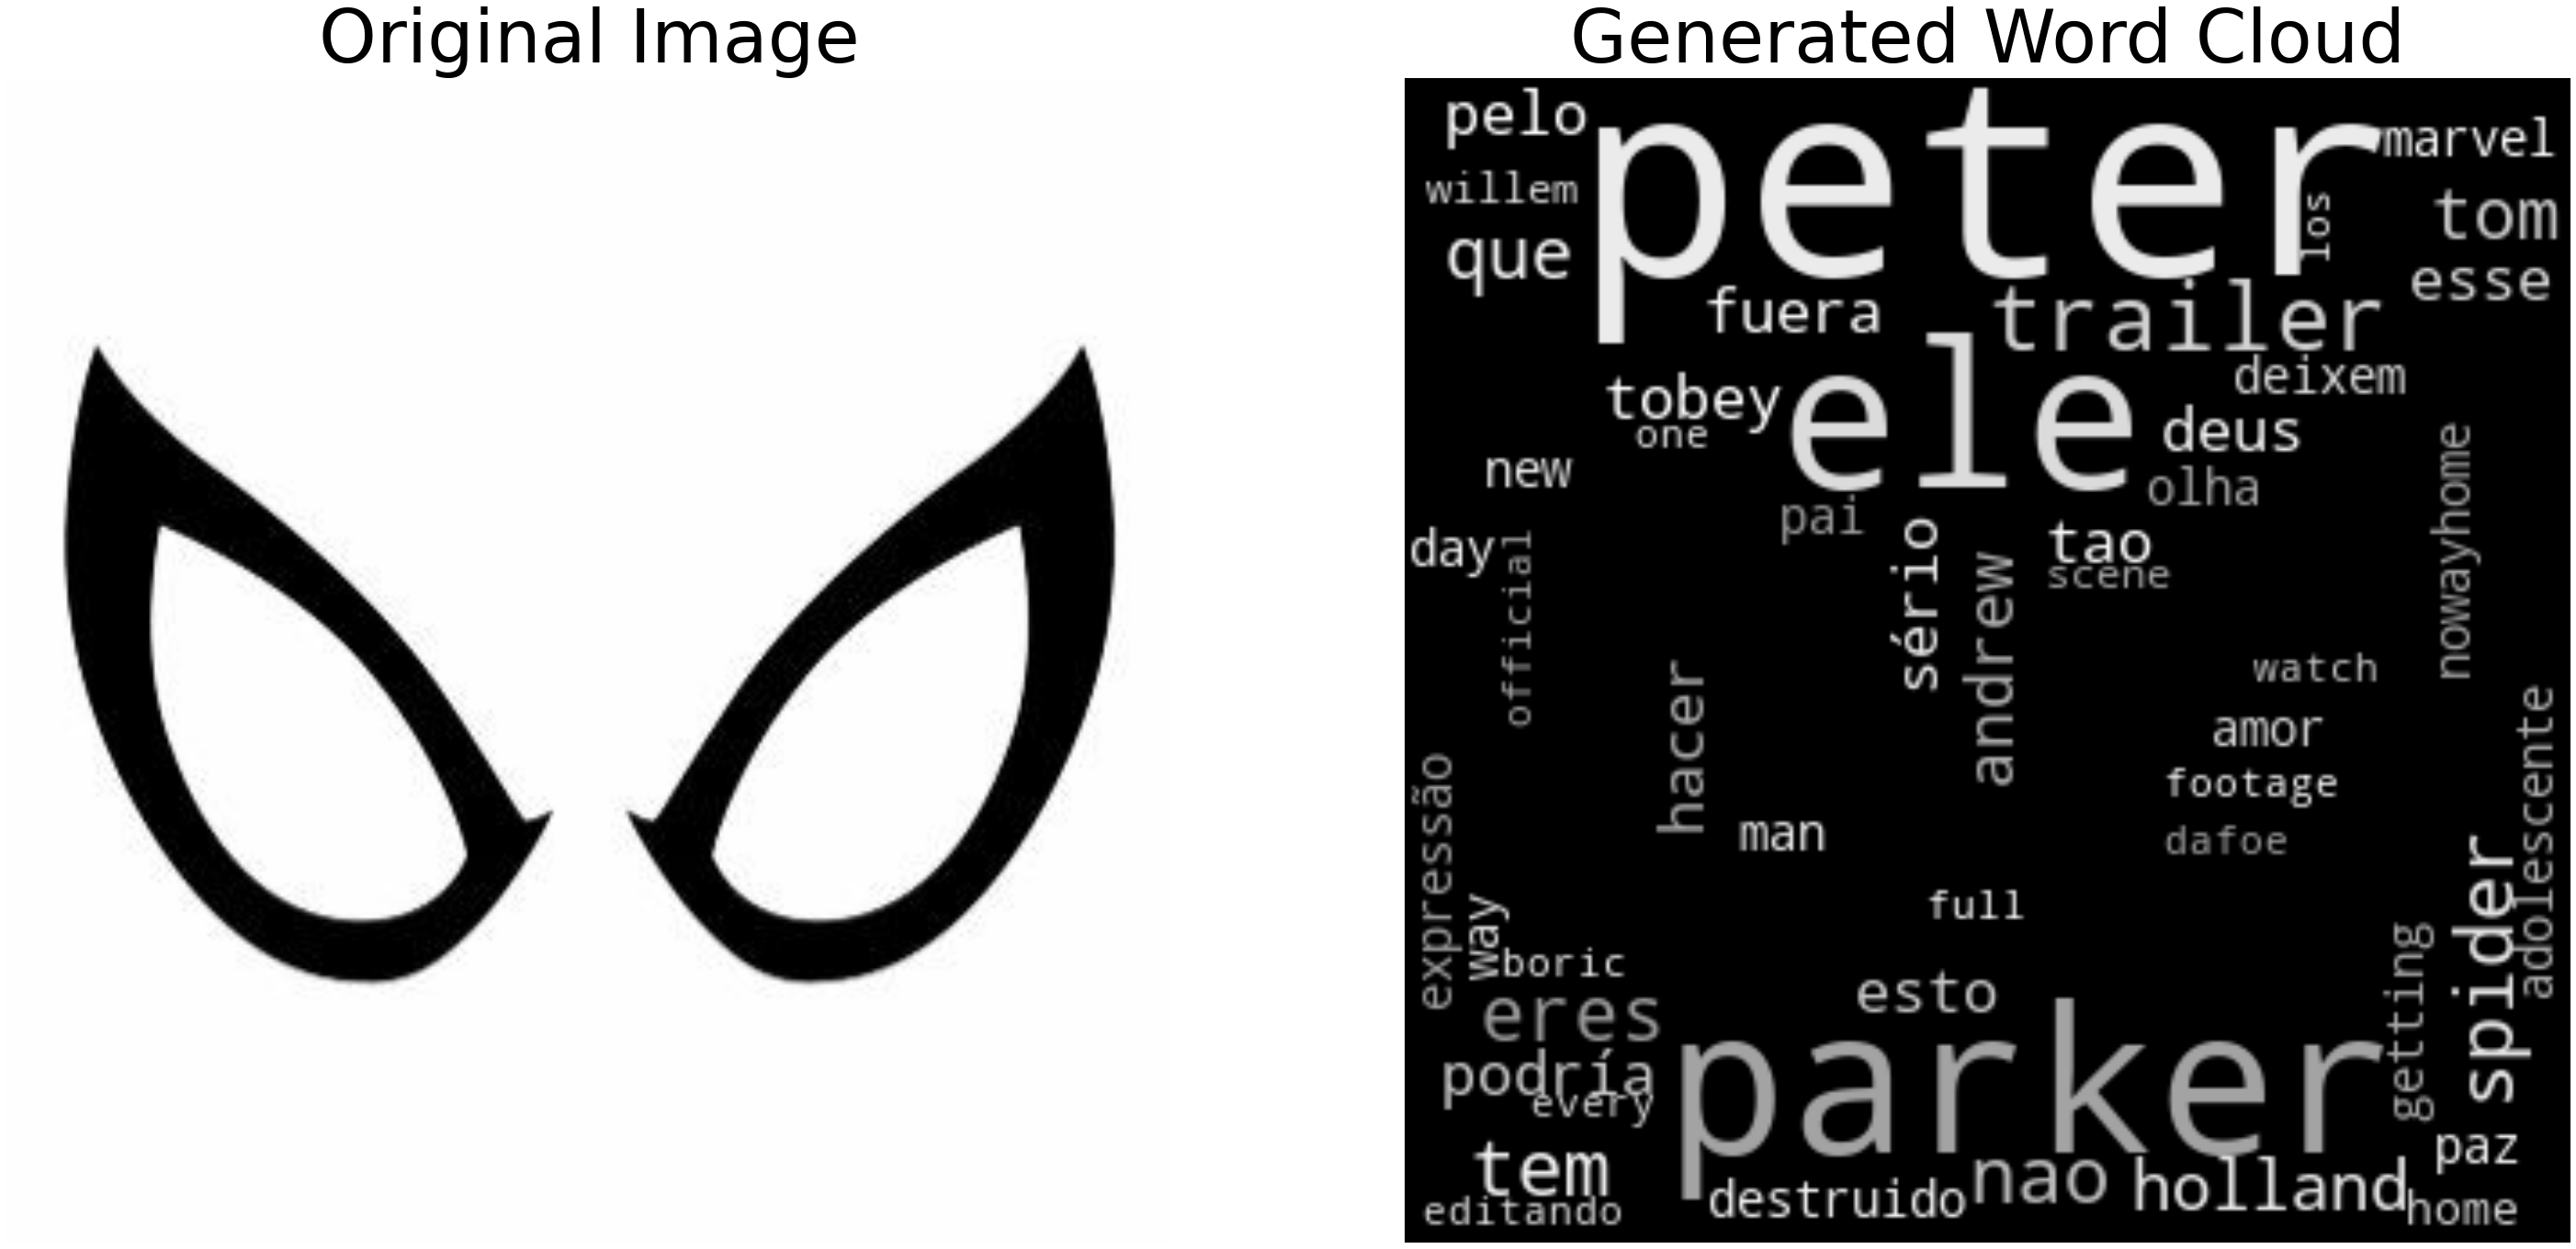

In [25]:
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
plt.title('Original Image', size=80)

plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title('Generated Word Cloud', size=80)
plt.axis("off")
plt.show()

# Stage Five: Import Bokeh and chart some aspect of the text

Finally, I used the sentiment analyzer to create a dateframe of the sentiment scores for tweets. I then created a scatterplot of the sentiment scores, most of which appeared to be nuetral or close to nuetral, with a few very negative or very positive outliers. 

In [26]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

sid = SentimentIntensityAnalyzer()

In [28]:
def calculate_sentiment(text):
    scores = sid.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [31]:
df_tweets['Sentiment Score'] = df_tweets['Tweet'].apply(calculate_sentiment)
df_tweets.sort_values(by='Sentiment Score', ascending=False)[20:35]

,Tweet,Date,User,Location,Source,Sentiment Score
242,RT @SpiderManMovie: happy ONE MONTH until #Spi...,2021-11-18 16:25:09+00:00,Karran66393808,"Bengaluru South, India",Twitter for Android,0.7840
1244,RT @mdcuniverse616: Would you like to see Andr...,2021-11-18 16:33:59+00:00,CellaNicholas,"Rocky Hill, CT",Twitter for iPhone,0.7835
264,RT @yrfreakyneighbr: Super excited for tomorro...,2021-11-18 16:25:18+00:00,LegendofTails,NaN,Twitter for iPhone,0.7644
97,Meanwhile\n\nA fan makes a better poster than ...,2021-11-18 16:24:01+00:00,AdrienXenohis,Maine-et-Loire,Twitter Web App,0.7579
345,RT @AdrienXenohis: Meanwhile\n\nA fan makes a ...,2021-11-18 16:26:01+00:00,OOCAnilougne,Sur Namek.,Twitter Web App,0.7579
1203,Perfect post credit scene for #SpiderManNoWayH...,2021-11-18 16:33:38+00:00,151theshow,United States,Twitter for Android,0.7430
45,RT @Hey_Arnold16: I would’ve been better off w...,2021-11-18 16:23:32+00:00,alex__davis23,Outer Space,Twitter for iPhone,0.7351
884,I'm so glad I watched #Loki and now have a bet...,2021-11-18 16:30:42+00:00,heyshanbailey,United States,Twitter Web App,0.7346
170,RT @StabX_YT: Spider Man No way Home 🕷\n\nAfte...,2021-11-18 16:24:36+00:00,StabX_YT,NaN,Twitter Web App,0.7345
269,"RT @RymSlim: ""The itsy bitsy spider went up th...",2021-11-18 16:25:21+00:00,ketamine74,NaN,Twitter for iPad,0.7249


In [32]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter

#file for output
output_file(filename="spiderman3.html", title="Spiderman 3 Twitter Visualization")

In [33]:
import math
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'])

source = ColumnDataSource(df_tweets)
p = figure(plot_height=1000, plot_width=1000, toolbar_location=None)
p.circle(x='Date', y='Sentiment Score',
         source=source,
         size=5, color='red')

p.xaxis.formatter=DatetimeTickFormatter()
p.xaxis.major_label_orientation = math.pi/2
p.title.text = 'Spiderman 3 Tweets'
p.xaxis.axis_label = 'Dates'
p.yaxis.axis_label = 'Sentiment Score'

In [34]:
hover = HoverTool()
hover.tooltips=[
    ('Tweet', '@Tweet')
]

p.add_tools(hover)

output_notebook()

Loading BokehJS ...

In [35]:
show(p)